In [52]:
!pip install mlxtend

     |████████████████████████████████| 1.3 MB 1.6 MB/s eta 0:00:01


In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/weiwei/Desktop/UCI - MSBA/Fall/Machine Learning/Project/bc_test_data_10.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Create dummy variable for diagnosis
df_1 = pd.get_dummies(df)
df_1

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,1


In [4]:
df2 = df.groupby(['diagnosis'])['diagnosis'].count()
df2

diagnosis
B    357
M    212
Name: diagnosis, dtype: int64

In [5]:
# Standerdizing the data: std_df
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

standardized_data = scaler.fit_transform(df_1)
#print(standardized_data)

std_df = pd.DataFrame(standardized_data, columns=df_1.columns)
std_df
#print(standardized_df)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,-0.236405,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,-1.297676,1.297676
1,-0.236403,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,-1.297676,1.297676
2,0.431741,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,-1.297676,1.297676
3,0.432121,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,-1.297676,1.297676
4,0.432201,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,-1.297676,1.297676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.235732,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,-1.297676,1.297676
565,-0.235730,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,-1.297676,1.297676
566,-0.235727,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,-1.297676,1.297676
567,-0.235725,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,-1.297676,1.297676


In [6]:
std_df['diagnosis_M'].value_counts()

-0.770609    357
 1.297676    212
Name: diagnosis_M, dtype: int64

In [7]:
new_data = std_df
new_data.head()

X = new_data.drop(['id', 'diagnosis_B', 'diagnosis_M'], axis=1)
y = df_1['diagnosis_M']

#y

# Euclidean Distance

In [8]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
typeii_error= []
typei_error = []

# p=2 is equivalent to euclidian distance
for k in range(1,11):
    knn_model = KNeighborsClassifier(algorithm='auto', 
                            leaf_size=30, 
                            metric='euclidean',        
                            metric_params=None, 
                            n_jobs=1, 
                            n_neighbors=k, 
                            weights='uniform')
    knn_model.fit(X,y) 
    
    y_pred = knn_model.predict(X)
    cm = confusion_matrix(y, y_pred)
    
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]
    
    ## type ii error
    typeii = FN/(TP+FP+FN+TN)
    typeii_error.append(typeii)
    
    ## type i error 
    typei = FP/(TP+FP+FN+TN)
    typei_error.append(typei)
    
    #test_error = 1 - accuracy_score(y,y_pred)
    #test_error_rates.append(test_error)
#test_error_rates



Text(0.5, 0, 'K Value')

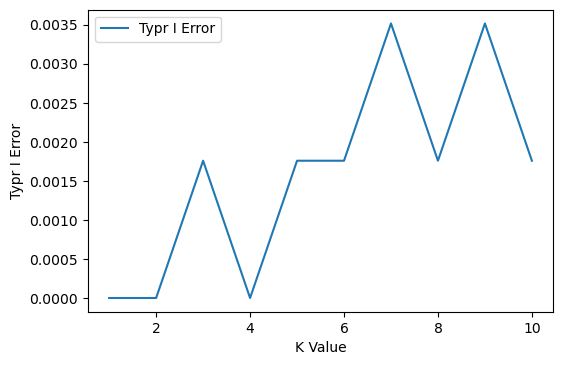

In [11]:
plt.figure(figsize=(6,4),dpi=100)
plt.plot(range(1,11),typei_error,label='Typr I Error')
plt.legend()
plt.ylabel('Typr I Error')
plt.xlabel("K Value")

#best k-value= 2 or 4, the least type I error

Text(0.5, 0, 'K Value')

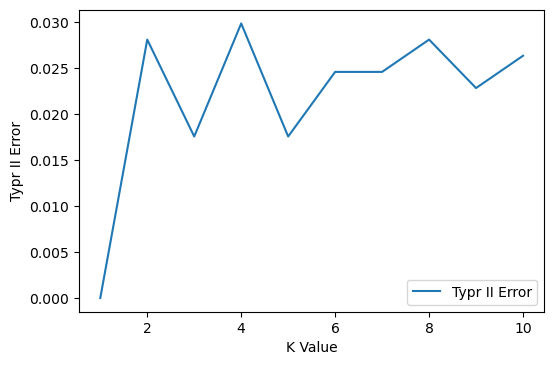

In [13]:
plt.figure(figsize=(6,4),dpi=100)
plt.plot(range(1,11),typeii_error,label='Typr II Error')
plt.legend()
plt.ylabel('Typr II Error')
plt.xlabel("K Value")

#best k-value= 3, the least type II error

### Using Cross Validation (10-fold) to find optimal k-value

In [14]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
%matplotlib inline

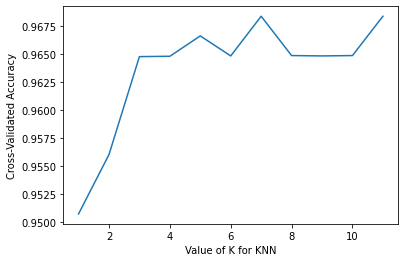

In [15]:
# find the best k-value with cross validation
k_range = range(1, 12)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(algorithm='auto', 
                            leaf_size=30, 
                            metric='euclidean',         
                            metric_params=None, 
                            n_jobs=1, 
                            n_neighbors=k, 
                            weights='uniform')
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# k-value: 3,7,9

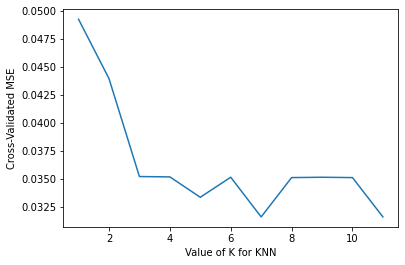

In [16]:
import matplotlib.pyplot as plt
k_range = range(1, 12)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(algorithm='auto', 
                            leaf_size=30, 
                            metric='euclidean',         
                            metric_params=None, 
                            n_jobs=1, 
                            n_neighbors=k, 
                            weights='uniform')
    loss = abs(cross_val_score(knn, X, y, cv=10, scoring='neg_mean_squared_error'))
    k_scores.append(loss.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated MSE')
plt.show()

#k-value: 7,9

## KNN Final Model with Euclidean Distance & Cross Validation

### k=3

In [20]:
## Basic Model
knn_model = KNeighborsClassifier(algorithm='auto', 
                            leaf_size=30, 
                            metric='euclidean',       
                            metric_params=None, 
                            n_jobs=1, 
                            n_neighbors=3, 
                            weights='uniform')
knn_model.fit(X,y) 
y_pred = knn_model.predict(X)
scores = cross_val_score(knn_model, X, y, cv=10, scoring='accuracy')
cm = confusion_matrix(y, y_pred)
    
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
    
## type ii error
typeii = FN/(TP+FP+FN+TN)
typeii_error.append(typeii)
    
## type i error 
typei = FP/(TP+FP+FN+TN)
typei_error.append(typei)

#Expected cost
cost_i = typei *1
cost_ii = typeii*100
exp_cost = cost_i + cost_ii

print (confusion_matrix(y, y_pred))
print ('Type I Error: %.4f' %typei)
print ('Type II Error: %.4f' %typeii)
print ('Expexted Cost: %.4f' %exp_cost)
print ('Cross Validation Mean Accuracy: %.4f' %scores.mean())


[[356   1]
 [ 10 202]]
Type I Error: 0.0018
Type II Error: 0.0176
Expexted Cost: 1.7592
Cross Validation Mean Accuracy: 0.9648


In [21]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.feature_extraction.text import TfidfVectorizer
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [22]:
# feature selection after building the basic model
#knn = KNeighborsClassifier(n_neighbors=3)
sfs1 = SFS(knn, 
           k_features=5, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=10)

sfs1 = sfs1.fit(X, y)

#sfs = SequentialFeatureSelector(knn, n_features_to_select= 3)
#sfs.fit(X, y)

#sfs.get_support()
#sfs.transform(X).shape
#get_feature_names()
#k_feratures_names_
#X

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished

[2022-12-01 01:18:54] Features: 1/5 -- score: 0.9121867167919799[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.5s finished

[2022-12-01 01:18:54] Features: 2/5 -- score: 0.9472431077694236[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.5s finished

[2022-12-01 01:18:55] Features: 3/5 -- score: 0.9594924812030076[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [24]:
#sfs1.subsets_
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['texture_mean', 'area_se', 'perimeter_worst', 'area_worst', 'smoothness_worst']


/var/folders/m9/98nfckqx6kbcgsd7xvv296vh0000gn/T/ipykernel_1310/610057710.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['diagnosis_M'] = df_1['diagnosis_M']


<AxesSubplot:>

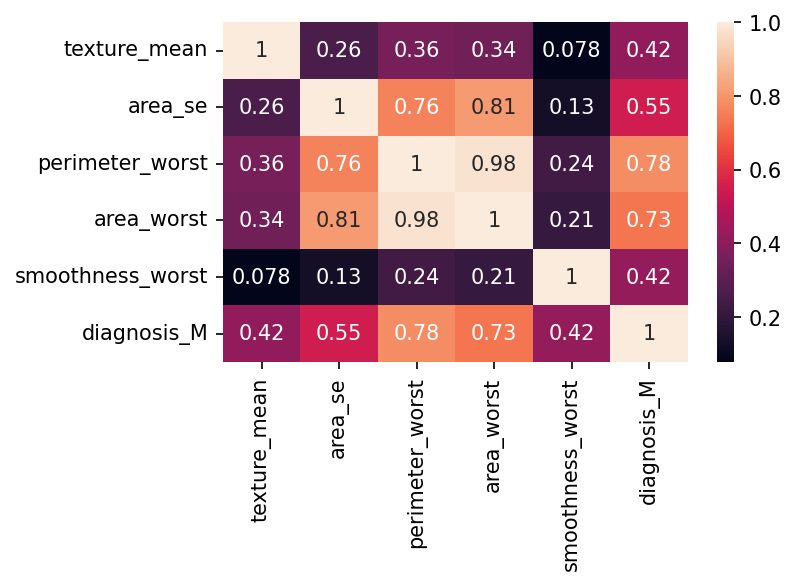

In [25]:
import seaborn as sns

new_data = std_df[feat_names]
new_data['diagnosis_M'] = df_1['diagnosis_M']
new_data.head()

X = new_data.drop(['diagnosis_M'], axis=1)
y = new_data['diagnosis_M']

#new_data.shape

plt.figure(figsize=(5,3), dpi=150)
sns.heatmap(new_data.corr(), annot=True)

#diagnosis_M & concave points_worst: 0.79
#diagnosis_M & radius_worst: 0.78

In [26]:
## Re-run the model using other dataset after removing unrelated attributes
knn_model = KNeighborsClassifier(algorithm='auto', 
                            leaf_size=30, 
                            metric='euclidean',       
                            metric_params=None, 
                            n_jobs=1, 
                            n_neighbors=3, 
                            weights='uniform')
knn_model.fit(X,y) 
scores = cross_val_score(knn_model, X, y, cv=10, scoring='accuracy')
y_pred = knn_model.predict(X)
cm = confusion_matrix(y, y_pred)
    
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
    
## type ii error
typeii = FN/(TP+FP+FN+TN)
typeii_error.append(typeii)
    
## type i error 
typei = FP/(TP+FP+FN+TN)
typei_error.append(typei)

#Expected cost
cost_i = typei *1
cost_ii = typeii*100
exp_cost = cost_i + cost_ii

print (confusion_matrix(y, y_pred))
print ('Type I Error: %.4f' %typei)
print ('Type II Error: %.4f' %typeii)
print ('Expexted Cost: %.4f' %exp_cost)
print ('Mean Cross Validation Accuracy: %.4f' %scores.mean())

[[355   2]
 [  8 204]]
Type I Error: 0.0035
Type II Error: 0.0141
Expexted Cost: 1.4095
Mean Cross Validation Accuracy: 0.9665


# Result: 
### After conduct feature selection (remain 5 attributes), the type II error has declined to 0.0228, previous 0.0246


## Resample the data in order to handel class imbalance problem 

<AxesSubplot:xlabel='diagnosis_M', ylabel='count'>

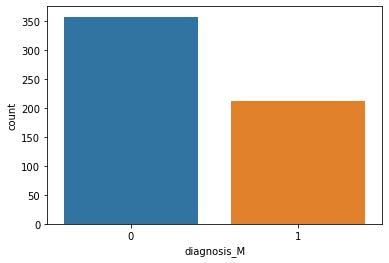

In [27]:
import seaborn as sns

sns.countplot(data=df_1, x='diagnosis_M')
#M: 357  B:212

In [28]:
from sklearn.utils import resample

B:  357
M:  212


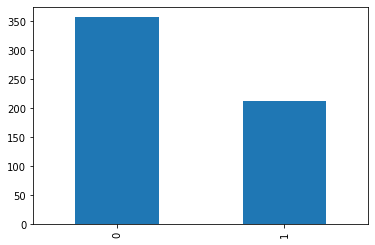

In [29]:
target_count = new_data.diagnosis_M.value_counts()
print('B: ', target_count[0])
print('M: ', target_count[1])

target_count.plot(kind='bar');

### Under-sampling

Undersampling: 
0    212
1    212
Name: diagnosis_M, dtype: int64


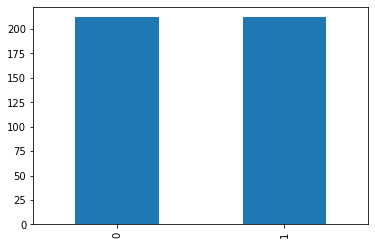

In [30]:
count_class_0, count_class_1 = new_data.diagnosis_M.value_counts()

# Divide by class
class_0 = new_data[new_data['diagnosis_M'] == 0]
class_1 = new_data[new_data['diagnosis_M'] == 1]

df_class_0_under = class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, class_1], axis=0)

print('Undersampling: ')
print(df_test_under.diagnosis_M.value_counts())

df_test_under.diagnosis_M.value_counts().plot(kind='bar');

In [31]:
df_test_under

,texture_mean,area_se,perimeter_worst,area_worst,smoothness_worst,diagnosis_M
106,-0.223317,-0.433809,-0.647878,-0.630885,1.597003,0
491,-1.410121,0.233502,0.590915,0.579086,-1.479400,0
153,-1.445027,-0.546898,-0.923695,-0.773100,0.075898,0
281,-1.226283,-0.055160,-0.672005,-0.609790,-1.261097,0
402,-0.232625,-0.442830,-0.326191,-0.454742,-1.713045,0
...,...,...,...,...,...,...
563,1.349781,1.726318,2.139779,1.649655,0.365215,1
564,0.721473,2.604187,1.752563,2.015301,0.378365,1
565,2.085134,1.291565,1.421940,1.494959,-0.691230,1
566,2.045574,0.180698,0.579001,0.427906,-0.809587,1


In [32]:
X = df_test_under.drop(['diagnosis_M'], axis=1)
y = df_test_under['diagnosis_M']

### under-sampling with euclidean distance & k=3 

In [40]:
X = df_test_under.drop(['diagnosis_M'], axis=1)
y = df_test_under['diagnosis_M']

knn_model = KNeighborsClassifier(algorithm='auto', 
                            leaf_size=30, 
                            metric='euclidean',       
                            metric_params=None, 
                            n_jobs=1, 
                            n_neighbors=3, 
                            weights='uniform')
knn_model.fit(X,y) 
y_pred = knn_model.predict(X)
cm = confusion_matrix(y, y_pred)
    
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
    
## type ii error
typeii = FN/(TP+FP+FN+TN)
typeii_error.append(typeii)
    
## type i error 
typei = FP/(TP+FP+FN+TN)
typei_error.append(typei)
#Expected cost
#cost_i = typei *1
#cost_ii = typeii*100
#exp_cost = cost_i + cost_ii

print (confusion_matrix(y, y_pred))
print ('Type I Error: %.4f' %typei)
print ('Type II Error: %.4f' %typeii)
#print ('Expexted Cost: %.4f' %exp_cost)

[[211   1]
 [  6 206]]
Type I Error: 0.0024
Type II Error: 0.0142


### Over-sampling

Random over-sampling:
0    357
1    357
Name: diagnosis_M, dtype: int64


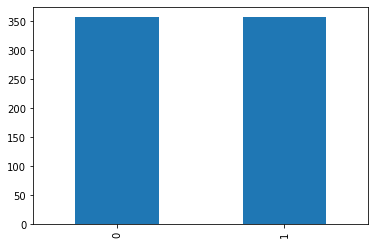

In [34]:
df_class_1_over = class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.diagnosis_M.value_counts())

df_test_over.diagnosis_M.value_counts().plot(kind='bar');

In [35]:
df_test_over.shape, df_test_under.shape, new_data.shape

((714, 6), (424, 6), (569, 6))

In [36]:
X = df_test_over.drop(['diagnosis_M'], axis=1)
y = df_test_over['diagnosis_M']

### over-sampling with eucildean distance & k=3
#### over-sampleing performs better than under-sampleing. Also, the type i and ii errors have decreased. 

In [39]:
X = df_test_over.drop(['diagnosis_M'], axis=1)
y = df_test_over['diagnosis_M']

knn_model = KNeighborsClassifier(algorithm='auto', 
                            leaf_size=30, 
                            metric='euclidean',       
                            metric_params=None, 
                            n_jobs=1, 
                            n_neighbors=3, 
                            weights='uniform')
knn_model.fit(X,y) 
y_pred = knn_model.predict(X)
cm = confusion_matrix(y, y_pred)
    
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
    
## type ii error
typeii = FN/(TP+FP+FN+TN)
typeii_error.append(typeii)
    
## type i error 
typei = FP/(TP+FP+FN+TN)
typei_error.append(typei)
#Expected cost
#cost_i = typei *1
#cost_ii = typeii*100
#exp_cost = cost_i + cost_ii

print (confusion_matrix(y, y_pred))
print ('Type I Error: %.4f' %typei)
print ('Type II Error: %.4f' %typeii)
#print ('Expexted Cost: %.4f' %exp_cost)

[[350   7]
 [  3 354]]
Type I Error: 0.0098
Type II Error: 0.0042


## Result: model with k=7, 5 attributes and process over-sampleing performs the best

## Next Step:
### Training Model with train Dataset then Test with test dataset

In [41]:
## input training & testing data
train = pd.read_csv('/Users/weiwei/Desktop/UCI - MSBA/Fall/Machine Learning/Project/bc_data_90.csv')
train_1 = pd.get_dummies(train)
print(train_1.shape)

test = pd.read_csv('/Users/weiwei/Desktop/UCI - MSBA/Fall/Machine Learning/Project/bc_test_data_10.csv')
test_1 = pd.get_dummies(test)
print(test_1.shape)

(512, 33)
(57, 33)


In [42]:
train_data = train_1[feat_names]
train_data['diagnosis_M'] = train_1['diagnosis_M']
#train_data.head()

test_data = test_1[feat_names]
test_data['diagnosis_M'] = test_1['diagnosis_M']

X_train = train_data.drop(['diagnosis_M'], axis=1)
y_train = train_data['diagnosis_M']

X_test = test_data.drop(['diagnosis_M'], axis=1)
y_test = test_data['diagnosis_M']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/var/folders/m9/98nfckqx6kbcgsd7xvv296vh0000gn/T/ipykernel_1310/31804026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['diagnosis_M'] = train_1['diagnosis_M']
/var/folders/m9/98nfckqx6kbcgsd7xvv296vh0000gn/T/ipykernel_1310/31804026.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['diagnosis_M'] = test_1['diagnosis_M']


In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((512, 5), (57, 5), (512,), (57,))

B:  319
M:  193


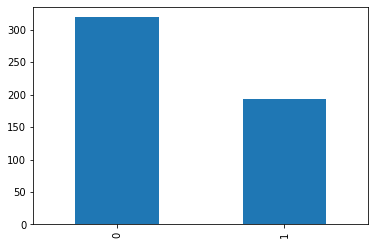

In [44]:
target_count = train_data.diagnosis_M.value_counts()
print('B: ', target_count[0])
print('M: ', target_count[1])

target_count.plot(kind='bar');

Undersampling: 
0    319
1    319
Name: diagnosis_M, dtype: int64


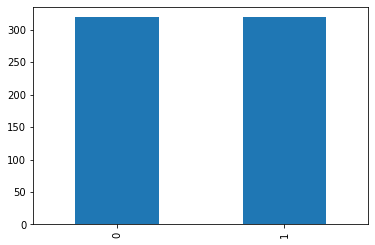

In [45]:
count_class_0, count_class_1 = train_data.diagnosis_M.value_counts()

# Divide by class
class_0 = train_data[train_data['diagnosis_M'] == 0]
class_1 = train_data[train_data['diagnosis_M'] == 1]

df_class_1_over = class_1.sample(count_class_0, replace=True)
df_test_under = pd.concat([class_0, df_class_1_over], axis=0)

print('Undersampling: ')
print(df_test_under.diagnosis_M.value_counts())

df_test_under.diagnosis_M.value_counts().plot(kind='bar');

In [46]:
X = df_test_over.drop(['diagnosis_M'], axis=1)
y = df_test_over['diagnosis_M']

In [47]:
## Re-run the model using other dataset after removing unrelated attributes
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(algorithm='auto', 
                            leaf_size=30, 
                            metric='euclidean',       
                            metric_params=None, 
                            n_jobs=1, 
                            n_neighbors=3, 
                            weights='uniform')
knn_model.fit(X_train,y_train) 
y_pred = knn_model.predict(X_train)

cm = confusion_matrix(y_train, y_pred)
    
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
    
## type ii error
typeii = FN/(TP+FP+FN+TN)
typeii_error.append(typeii)
    
## type i error 
typei = FP/(TP+FP+FN+TN)
typei_error.append(typei)
#Expected cost
cost_i = typei *1
cost_ii = typeii*100
exp_cost = cost_i + cost_ii

print (confusion_matrix(y_train, y_pred))
print ('Type I Error: %.4f' %typei)
print ('Type II Error: %.4f' %typeii)
print ('Expexted Cost: %.4f' %exp_cost)

scores = cross_val_score(knn_model, X_train, y_train, cv=10, scoring='accuracy')
print ('Mean Cross Validation Accuracy: %.4f' %scores.mean())


[[317   2]
 [  7 186]]
Type I Error: 0.0039
Type II Error: 0.0137
Expexted Cost: 1.3711
Mean Cross Validation Accuracy: 0.9610


In [49]:
## Re-run the model using test dataset
knn_model = KNeighborsClassifier(algorithm='auto', 
                            leaf_size=30, 
                            metric='euclidean',       
                            metric_params=None, 
                            n_jobs=1, 
                            n_neighbors=3, 
                            weights='uniform')
knn_model.fit(X_test,y_test) 
y_pred = knn_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
    
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
    
## type ii error
typeii = FN/(TP+FP+FN+TN)
typeii_error.append(typeii)
    
## type i error 
typei = FP/(TP+FP+FN+TN)
typei_error.append(typei)

#Expected cost
cost_i = typei *1
cost_ii = typeii*100
exp_cost = cost_i + cost_ii

print (confusion_matrix(y_test, y_pred))
print ('Type I Error: %.4f' %typei)
print ('Type II Error: %.4f' %typeii)

scores = cross_val_score(knn_model, X_test, y_test, cv=10, scoring='accuracy')
print ('Mean Cross Validation Accuracy: %.4f' %scores.mean())

print ('Expexted Cost: %.4f' %exp_cost)

[[38  0]
 [ 1 18]]
Type I Error: 0.0000
Type II Error: 0.0175
Mean Cross Validation Accuracy: 0.9500
Expexted Cost: 1.7544


# Manhattan Distance

In [50]:
new_data = std_df
new_data.head()

X = new_data.drop(['id', 'diagnosis_B', 'diagnosis_M'], axis=1)
y = df_1['diagnosis_M']

In [51]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix, precision_score, recall_score

knn_model = KNeighborsClassifier()
#test_error_rates = []
typei_error =[ ]
typeii_error =[ ]

# p=1 is equivalent to manhattan distance
for k in range(1,12):
    knn_model = KNeighborsClassifier(algorithm='auto', 
                            leaf_size=30, 
                            metric='manhattan',       
                            metric_params=None, 
                            n_jobs=1, 
                            n_neighbors=k, 
                            weights='uniform')
    knn_model.fit(X,y) 
    
    y_pred = knn_model.predict(X)
    cm = confusion_matrix(y, y_pred)
    
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]
    
    ## type ii error
    typeii = FN/(TP+FP+FN+TN)
    typeii_error.append(typeii)
    
    ## type i error 
    typei = FP/(TP+FP+FN+TN)
    typei_error.append(typei)
    
    #test_error = 1 - accuracy_score(y,y_pred)
    #test_error_rates.append(test_error)
#test_error_rates



Text(0.5, 0, 'K Value')

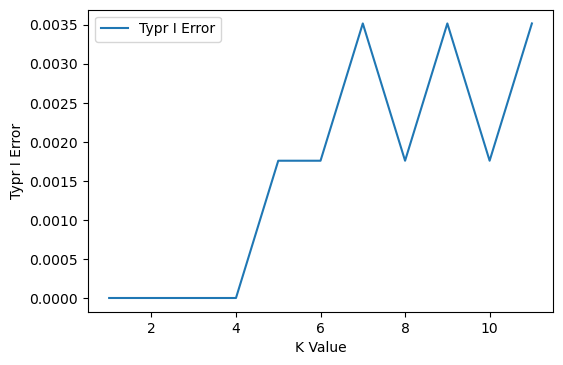

In [52]:
plt.figure(figsize=(6,4),dpi=100)
plt.plot(range(1,12),typei_error,label='Typr I Error')
plt.legend()
plt.ylabel('Typr I Error')
plt.xlabel("K Value")

Text(0.5, 0, 'K Value')

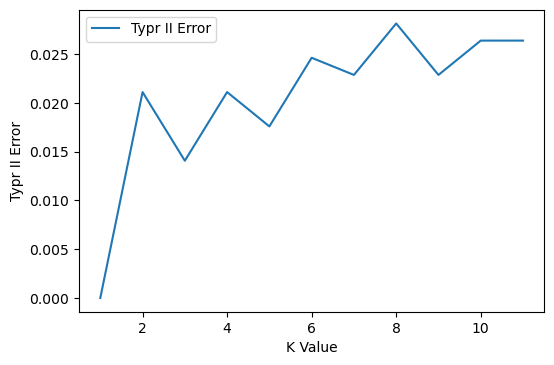

In [53]:
plt.figure(figsize=(6,4),dpi=100)
plt.plot(range(1,12),typeii_error,label='Typr II Error')
plt.legend()
plt.ylabel('Typr II Error')
plt.xlabel("K Value")

## Using Cross Validation (10-fold) to find the optimal k-value

In [54]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
%matplotlib inline

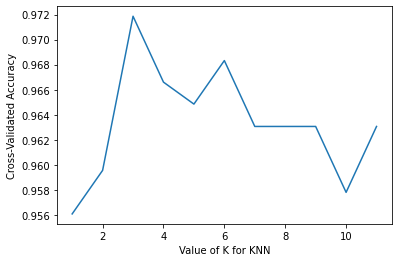

In [55]:
# find the best k-value with cross validation
k_range = range(1, 12)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(algorithm='auto', 
                            leaf_size=30, 
                            metric='manhattan',         
                            metric_params=None, 
                            n_jobs=1, 
                            n_neighbors=k, 
                            weights='uniform')
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

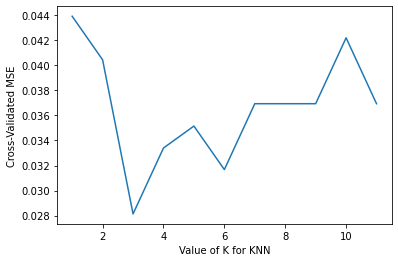

In [56]:
import matplotlib.pyplot as plt
k_range = range(1, 12)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(algorithm='auto', 
                            leaf_size=30, 
                            metric='manhattan',         
                            metric_params=None, 
                            n_jobs=1, 
                            n_neighbors=k, 
                            weights='uniform')
    loss = abs(cross_val_score(knn, X, y, cv=10, scoring='neg_mean_squared_error'))
    k_scores.append(loss.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated MSE')
plt.show()

# k: 5,7,9

## KNN Model with Mahanttan Distance 
### k= 3

In [64]:
# knn model with Mahanttan Distance & k=3 (least type ii error)
knn_model = KNeighborsClassifier(algorithm='auto', 
                            leaf_size=30, 
                            metric='manhattan',        
                            metric_params=None, 
                            n_jobs=1, 
                            n_neighbors=3, 
                            weights='uniform')

knn_model.fit(X,y) 
y_pred = knn_model.predict(X)
cm = confusion_matrix(y, y_pred)
    
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
    
## type ii error
typeii = FN/(TP+FP+FN+TN)
typeii_error.append(typeii)
    
## type i error 
typei = FP/(TP+FP+FN+TN)
typei_error.append(typei)

#Expected cost
cost_i = typei *1
cost_ii = typeii*100
exp_cost = cost_i + cost_ii

print (confusion_matrix(y, y_pred))
print ('Type I Error: %.4f' %typei)
print ('Type II Error: %.4f' %typeii)
print ('Expexted Cost: %.4f' %exp_cost)

scores = cross_val_score(knn_model, X, y, cv=10, scoring='accuracy')
print ('Mean Cross Validation Accuracy: %.4f' %scores.mean())

[[355   2]
 [  9 203]]
Type I Error: 0.0035
Type II Error: 0.0158
Expexted Cost: 1.5852
Mean Cross Validation Accuracy: 0.9701


In [65]:
# feature selection after building the basic model
#knn = KNeighborsClassifier(n_neighbors=3)
sfs1 = SFS(knn_model, 
           k_features=5, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=10)

sfs1 = sfs1.fit(X, y)

#sfs = SequentialFeatureSelector(knn, n_features_to_select= 3)
#sfs.fit(X, y)

#sfs.get_support()
#sfs.transform(X).shape
#get_feature_names()
#k_feratures_names_
#X

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished

[2022-12-01 02:41:02] Features: 1/5 -- score: 0.9121867167919799[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished

[2022-12-01 02:41:02] Features: 2/5 -- score: 0.9489974937343357[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished

[2022-12-01 02:41:02] Features: 3/5 -- score: 0.9542919799498746[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [66]:
#sfs1.subsets_
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['concavity_mean', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst']


/var/folders/m9/98nfckqx6kbcgsd7xvv296vh0000gn/T/ipykernel_1310/610057710.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['diagnosis_M'] = df_1['diagnosis_M']


<AxesSubplot:>

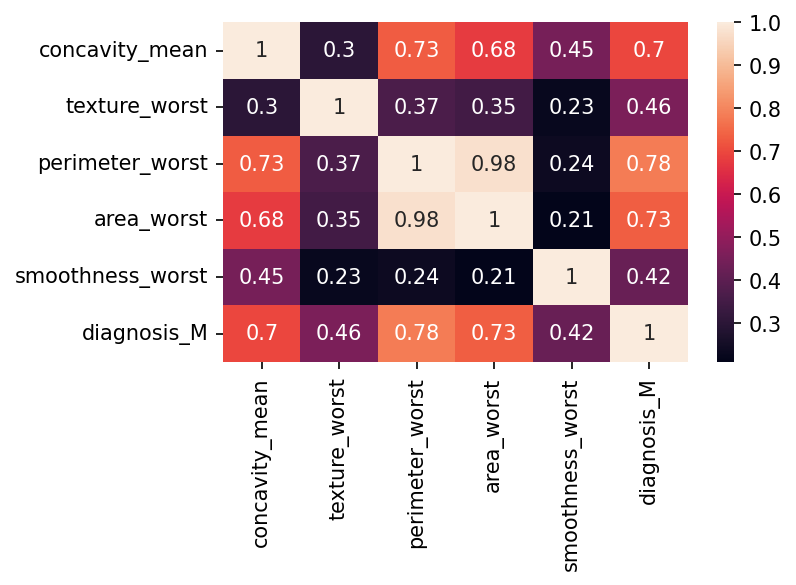

In [67]:
import seaborn as sns

new_data = std_df[feat_names]
new_data['diagnosis_M'] = df_1['diagnosis_M']
new_data.head()

X = new_data.drop(['diagnosis_M'], axis=1)
y = new_data['diagnosis_M']

#new_data.shape

plt.figure(figsize=(5,3), dpi=150)
sns.heatmap(new_data.corr(), annot=True)

#diagnosis_M & concave points_worst: 0.79
#diagnosis_M & radius_worst: 0.78

In [68]:
## Re-run the model using other dataset after removing unrelated attributes
knn_model.fit(X,y) 
y_pred = knn_model.predict(X)
cm = confusion_matrix(y, y_pred)
    
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
    
## type ii error
typeii = FN/(TP+FP+FN+TN)
typeii_error.append(typeii)
    
## type i error 
typei = FP/(TP+FP+FN+TN)
typei_error.append(typei)
#Expected cost
#cost_i = typei *1
#cost_ii = typeii*100
#exp_cost = cost_i + cost_ii

print (confusion_matrix(y, y_pred))
print ('Type I Error: %.4f' %typei)
print ('Type II Error: %.4f' %typeii)
#print ('Expexted Cost: %.4f' %exp_cost)

scores = cross_val_score(knn_model, X, y, cv=10, scoring='accuracy')
print ('Mean Cross Validation Accuracy: %.4f' %scores.mean())

[[355   2]
 [  9 203]]
Type I Error: 0.0035
Type II Error: 0.0158
Mean Cross Validation Accuracy: 0.9701


# Resample

In [69]:
from sklearn.utils import resample

B:  357
M:  212


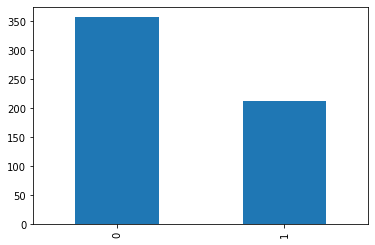

In [70]:
target_count = new_data.diagnosis_M.value_counts()
print('B: ', target_count[0])
print('M: ', target_count[1])

target_count.plot(kind='bar');

### Under-resampling

In [71]:
knn_model = KNeighborsClassifier(algorithm='auto', 
                            leaf_size=30, 
                            metric='manhattan',       
                            metric_params=None, 
                            n_jobs=1, 
                            n_neighbors=3, 
                            weights='uniform')

In [72]:
# under resampling
X = df_test_under.drop(['diagnosis_M'], axis=1)
y = df_test_under['diagnosis_M']
#y.shape

knn_model.fit(X,y) 
y_pred = knn_model.predict(X)
cm = confusion_matrix(y, y_pred)
    
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
    
## type ii error
typeii = FN/(TP+FP+FN+TN)
typeii_error.append(typeii)
    
## type i error 
typei = FP/(TP+FP+FN+TN)
typei_error.append(typei)
#Expected cost
#cost_i = typei *1
#cost_ii = typeii*100
#exp_cost = cost_i + cost_ii

print (confusion_matrix(y, y_pred))
print ('Type I Error: %.4f' %typei)
print ('Type II Error: %.4f' %typeii)
#print ('Expexted Cost: %.4f' %exp_cost)

scores = cross_val_score(knn_model, X, y, cv=10, scoring='accuracy')
print ('Mean Cross Validation Accuracy: %.4f' %scores.mean())

[[304  15]
 [  8 311]]
Type I Error: 0.0235
Type II Error: 0.0125
Mean Cross Validation Accuracy: 0.9185


In [73]:
# Oversampling
X = df_test_over.drop(['diagnosis_M'], axis=1)
y = df_test_over['diagnosis_M']

knn_model.fit(X,y) 
y_pred = knn_model.predict(X)
cm = confusion_matrix(y, y_pred)
    
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
    
## type ii error
typeii = FN/(TP+FP+FN+TN)
typeii_error.append(typeii)
    
## type i error 
typei = FP/(TP+FP+FN+TN)
typei_error.append(typei)
#Expected cost
#cost_i = typei *1
#cost_ii = typeii*100
#exp_cost = cost_i + cost_ii

print (confusion_matrix(y, y_pred))
print ('Type I Error: %.4f' %typei)
print ('Type II Error: %.4f' %typeii)
#print ('Expexted Cost: %.4f' %exp_cost)

scores = cross_val_score(knn_model, X, y, cv=10, scoring='accuracy')
print ('Mean Cross Validation Accuracy: %.4f' %scores.mean())

[[347  10]
 [  3 354]]
Type I Error: 0.0140
Type II Error: 0.0042
Mean Cross Validation Accuracy: 0.9650


In [74]:
## training & testing
## input training & testing data
train = pd.read_csv('/Users/weiwei/Desktop/UCI - MSBA/Fall/Machine Learning/Project/bc_data_90.csv')
train_1 = pd.get_dummies(train)
print(train_1.shape)

test = pd.read_csv('/Users/weiwei/Desktop/UCI - MSBA/Fall/Machine Learning/Project/bc_test_data_10.csv')
test_1 = pd.get_dummies(test)
print(test_1.shape)

(512, 33)
(57, 33)


In [75]:
train_data = train_1[feat_names]
train_data['diagnosis_M'] = train_1['diagnosis_M']
#train_data.head()

test_data = test_1[feat_names]
test_data['diagnosis_M'] = test_1['diagnosis_M']

X_train = train_data.drop(['diagnosis_M'], axis=1)
y_train = train_data['diagnosis_M']

X_test = test_data.drop(['diagnosis_M'], axis=1)
y_test = test_data['diagnosis_M']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/var/folders/m9/98nfckqx6kbcgsd7xvv296vh0000gn/T/ipykernel_1310/31804026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['diagnosis_M'] = train_1['diagnosis_M']
/var/folders/m9/98nfckqx6kbcgsd7xvv296vh0000gn/T/ipykernel_1310/31804026.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['diagnosis_M'] = test_1['diagnosis_M']


B:  319
M:  193


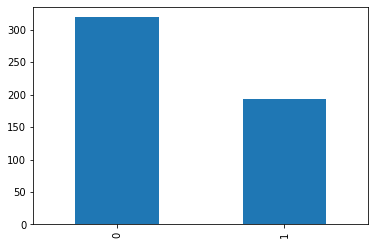

In [76]:
target_count = train_data.diagnosis_M.value_counts()
print('B: ', target_count[0])
print('M: ', target_count[1])

target_count.plot(kind='bar');

Undersampling: 
0    319
1    319
Name: diagnosis_M, dtype: int64


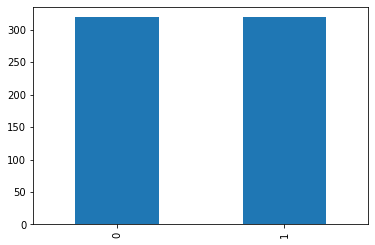

In [77]:
count_class_0, count_class_1 = train_data.diagnosis_M.value_counts()

# Divide by class
class_0 = train_data[train_data['diagnosis_M'] == 0]
class_1 = train_data[train_data['diagnosis_M'] == 1]

df_class_1_over = class_1.sample(count_class_0, replace=True)
df_test_under = pd.concat([class_0, df_class_1_over], axis=0)

print('Undersampling: ')
print(df_test_under.diagnosis_M.value_counts())

df_test_under.diagnosis_M.value_counts().plot(kind='bar');

In [78]:
X = df_test_over.drop(['diagnosis_M'], axis=1)
y = df_test_over['diagnosis_M']

knn_model = KNeighborsClassifier(algorithm='auto', 
                            leaf_size=30, 
                            metric='manhattan',       
                            metric_params=None, 
                            n_jobs=1, 
                            n_neighbors=3, 
                            weights='uniform')

knn_model.fit(X_train,y_train) 
y_pred = knn_model.predict(X_train)

cm = confusion_matrix(y_train, y_pred)
    
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
    
## type ii error
typeii = FN/(TP+FP+FN+TN)
typeii_error.append(typeii)
    
## type i error 
typei = FP/(TP+FP+FN+TN)
typei_error.append(typei)
#Expected cost
cost_i = typei *1
cost_ii = typeii*100
exp_cost = cost_i + cost_ii

print (confusion_matrix(y_train, y_pred))
print ('Type I Error: %.4f' %typei)
print ('Type II Error: %.4f' %typeii)
print ('Expexted Cost: %.4f' %exp_cost)

scores = cross_val_score(knn_model, X_train, y_train, cv=10, scoring='accuracy')
print ('Mean Cross Validation Accuracy: %.4f' %scores.mean())

[[318   1]
 [  8 185]]
Type I Error: 0.0020
Type II Error: 0.0156
Expexted Cost: 1.5645
Mean Cross Validation Accuracy: 0.9707


In [79]:
## Re-run the model using test dataset
knn_model = KNeighborsClassifier(algorithm='auto', 
                            leaf_size=30, 
                            metric='manhattan',       
                            metric_params=None, 
                            n_jobs=1, 
                            n_neighbors=3, 
                            weights='uniform')
knn_model.fit(X_test,y_test) 

y_pred = knn_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
    
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
    
## type ii error
typeii = FN/(TP+FP+FN+TN)
typeii_error.append(typeii)
    
## type i error 
typei = FP/(TP+FP+FN+TN)
typei_error.append(typei)

#Expected cost
cost_i = typei *1
cost_ii = typeii*100
exp_cost = cost_i + cost_ii

print (confusion_matrix(y_test, y_pred))
print ('Type I Error: %.4f' %typei)
print ('Type II Error: %.4f' %typeii)
print ('Expexted Cost: %.4f' %exp_cost)

scores = cross_val_score(knn_model, X_test, y_test, cv=10, scoring='accuracy')
print ('Mean Cross Validation Accuracy: %.4f' %scores.mean())

[[38  0]
 [ 0 19]]
Type I Error: 0.0000
Type II Error: 0.0000
Expexted Cost: 0.0000
Mean Cross Validation Accuracy: 0.9667


# Chebeyshev Distance

In [117]:
new_data = std_df
new_data.head()

X = new_data.drop(['id', 'diagnosis_B', 'diagnosis_M'], axis=1)
y = df_1['diagnosis_M']

In [118]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
#test_error_rates = []
typei_error =[ ]
typeii_error =[ ]

# p=1 is equivalent to manhattan distance
for k in range(1,12):
    knn_model = KNeighborsClassifier(algorithm='auto', 
                            leaf_size=30, 
                            metric='chebyshev',         
                            metric_params=None, 
                            n_jobs=1, 
                            n_neighbors=k, 
                            weights='uniform')
    knn_model.fit(X,y) 
    
    y_pred = knn_model.predict(X)

    cm = confusion_matrix(y, y_pred)
    
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]
    
    ## type ii error
    typeii = FN/(TP+FP+FN+TN)
    typeii_error.append(typeii)
    
    ## type i error 
    typei = FP/(TP+FP+FN+TN)
    typei_error.append(typei)
    
    #test_error = 1 - accuracy_score(y,y_pred)
    #test_error_rates.append(test_error)
#test_error_rates



Text(0.5, 0, 'K Value')

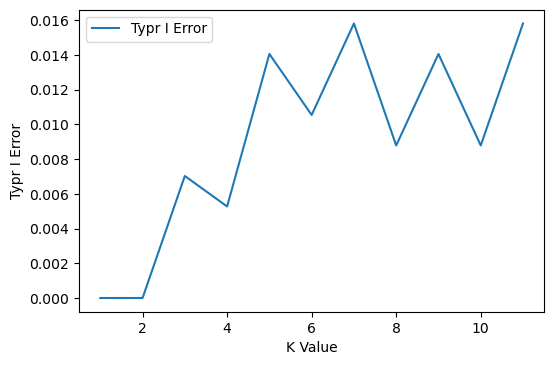

In [119]:
plt.figure(figsize=(6,4),dpi=100)
plt.plot(range(1,12),typei_error,label='Typr I Error')
plt.legend()
plt.ylabel('Typr I Error')
plt.xlabel("K Value")

#best k-value= 2 or 4, the least type I error

Text(0.5, 0, 'K Value')

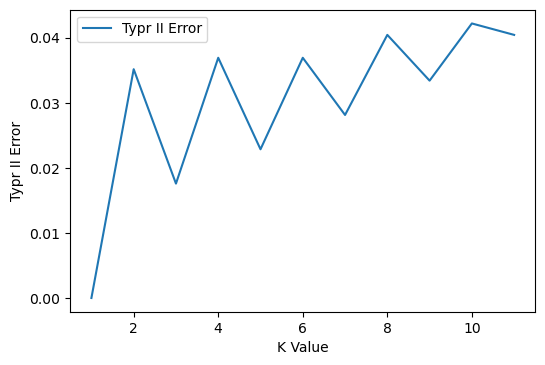

In [120]:
plt.figure(figsize=(6,4),dpi=100)
plt.plot(range(1,12),typeii_error,label='Typr II Error')
plt.legend()
plt.ylabel('Typr II Error')
plt.xlabel("K Value")

#best k-value= 3, the least type I error

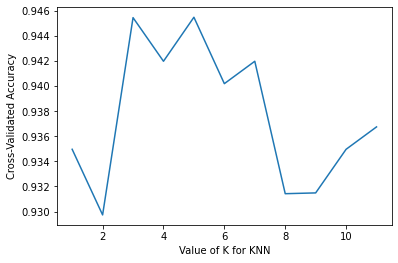

In [121]:
# find the best k-value with cross validation
k_range = range(1, 12)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(algorithm='auto', 
                            leaf_size=30, 
                            metric='chebyshev',         
                            metric_params=None, 
                            n_jobs=1, 
                            n_neighbors=k, 
                            weights='uniform')
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# k-value: 3,7,9

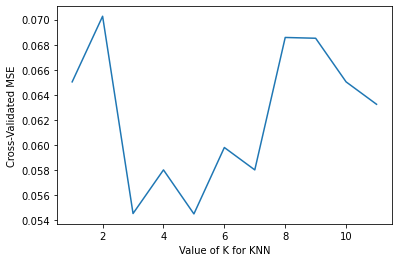

In [122]:
import matplotlib.pyplot as plt
k_range = range(1, 12)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(algorithm='auto', 
                            leaf_size=30, 
                            metric='chebyshev',         
                            metric_params=None, 
                            n_jobs=1, 
                            n_neighbors=k, 
                            weights='uniform')
    loss = abs(cross_val_score(knn, X, y, cv=10, scoring='neg_mean_squared_error'))
    k_scores.append(loss.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated MSE')
plt.show()

#k-value: 7,9

In [123]:
## Basic Model
knn_model = KNeighborsClassifier(algorithm='auto', 
                            leaf_size=30, 
                            metric='chebyshev',       
                            metric_params=None, 
                            n_jobs=1, 
                            n_neighbors=3, 
                            weights='uniform')

In [124]:
knn_model.fit(X,y) 
y_pred = knn_model.predict(X)
cm = confusion_matrix(y, y_pred)
    
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
    
## type ii error
typeii = FN/(TP+FP+FN+TN)
typeii_error.append(typeii)
    
## type i error 
typei = FP/(TP+FP+FN+TN)
typei_error.append(typei)

#Expected cost
cost_i = typei *1
cost_ii = typeii*100
exp_cost = cost_i + cost_ii

print (confusion_matrix(y, y_pred))
print ('Type I Error: %.4f' %typei)
print ('Type II Error: %.4f' %typeii)
print ('Expexted Cost: %.4f' %exp_cost)

scores = cross_val_score(knn_model, X, y, cv=10, scoring='accuracy')
print ('Mean Cross Validation Accuracy: %.4f' %scores.mean())

[[353   4]
 [ 10 202]]
Type I Error: 0.0070
Type II Error: 0.0176
Expexted Cost: 1.7645
Mean Cross Validation Accuracy: 0.9455


In [125]:
# feature selection after building the basic model
#knn = KNeighborsClassifier(n_neighbors=3)
sfs1 = SFS(knn_model, 
           k_features=5, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=10)

sfs1 = sfs1.fit(X, y)

#sfs = SequentialFeatureSelector(knn, n_features_to_select= 3)
#sfs.fit(X, y)

#sfs.get_support()
#sfs.transform(X).shape
#get_feature_names()
#k_feratures_names_
#X

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished

[2022-12-01 03:38:43] Features: 1/5 -- score: 0.9121867167919799[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.5s finished

[2022-12-01 03:38:44] Features: 2/5 -- score: 0.9437343358395991[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.5s finished

[2022-12-01 03:38:44] Features: 3/5 -- score: 0.956015037593985[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

In [130]:
#sfs1.subsets_
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst']


/var/folders/m9/98nfckqx6kbcgsd7xvv296vh0000gn/T/ipykernel_1310/610057710.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['diagnosis_M'] = df_1['diagnosis_M']


<AxesSubplot:>

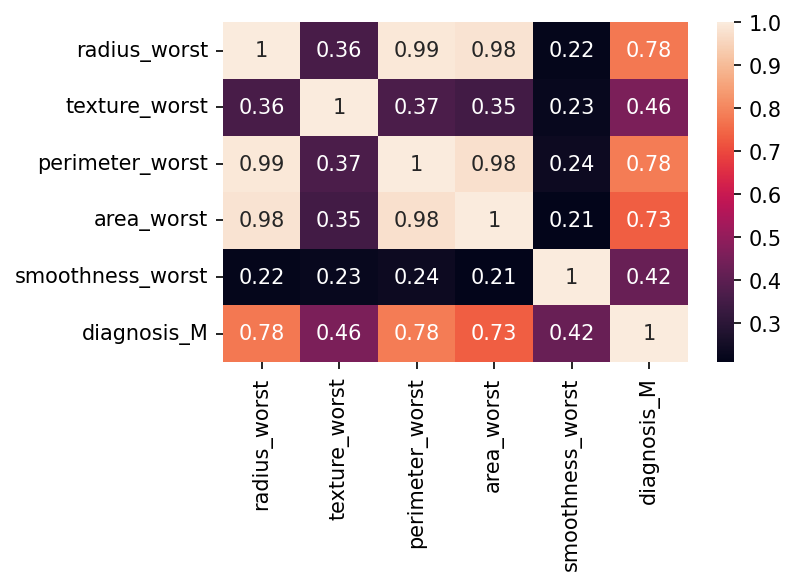

In [131]:
import seaborn as sns

new_data = std_df[feat_names]
new_data['diagnosis_M'] = df_1['diagnosis_M']
new_data.head()

X = new_data.drop(['diagnosis_M'], axis=1)
y = new_data['diagnosis_M']

#new_data.shape

plt.figure(figsize=(5,3), dpi=150)
sns.heatmap(new_data.corr(), annot=True)

#diagnosis_M & concave points_worst: 0.79
#diagnosis_M & radius_worst: 0.78

In [132]:
## Re-run the model using other dataset after removing unrelated attributes: better
knn_model = KNeighborsClassifier(algorithm='auto', 
                            leaf_size=30, 
                            metric='chebyshev',       
                            metric_params=None, 
                            n_jobs=1, 
                            n_neighbors=3, 
                            weights='uniform')
knn_model.fit(X,y) 
y_pred = knn_model.predict(X)
cm = confusion_matrix(y, y_pred)
    
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
    
## type ii error
typeii = FN/(TP+FP+FN+TN)
typeii_error.append(typeii)
    
## type i error 
typei = FP/(TP+FP+FN+TN)
typei_error.append(typei)
#Expected cost
#cost_i = typei *1
#cost_ii = typeii*100
#exp_cost = cost_i + cost_ii

print (confusion_matrix(y, y_pred))
print ('Type I Error: %.4f' %typei)
print ('Type II Error: %.4f' %typeii)
#print ('Expexted Cost: %.4f' %exp_cost)

scores = cross_val_score(knn_model, X, y, cv=10, scoring='accuracy')
print ('Mean Cross Validation Accuracy: %.4f' %scores.mean())

[[353   4]
 [  9 203]]
Type I Error: 0.0070
Type II Error: 0.0158
Mean Cross Validation Accuracy: 0.9736


B:  357
M:  212


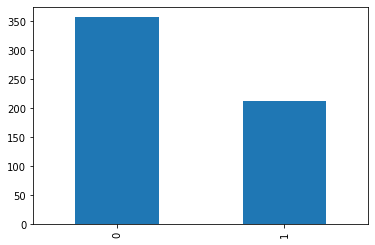

In [133]:
## Resample
target_count = new_data.diagnosis_M.value_counts()
print('B: ', target_count[0])
print('M: ', target_count[1])

target_count.plot(kind='bar');

In [134]:
knn_model = KNeighborsClassifier(algorithm='auto', 
                            leaf_size=30, 
                            metric='chebyshev',       
                            metric_params=None, 
                            n_jobs=1, 
                            n_neighbors=3, 
                            weights='uniform')

In [135]:
## under resample
X = df_test_under.drop(['diagnosis_M'], axis=1)
y = df_test_under['diagnosis_M']

knn_model.fit(X,y) 
y_pred = knn_model.predict(X)
cm = confusion_matrix(y, y_pred)
    
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
    
## type ii error
typeii = FN/(TP+FP+FN+TN)
typeii_error.append(typeii)
    
## type i error 
typei = FP/(TP+FP+FN+TN)
typei_error.append(typei)
#Expected cost
#cost_i = typei *1
#cost_ii = typeii*100
#exp_cost = cost_i + cost_ii

print (confusion_matrix(y, y_pred))
print ('Type I Error: %.4f' %typei)
print ('Type II Error: %.4f' %typeii)
#print ('Expexted Cost: %.4f' %exp_cost)

scores = cross_val_score(knn_model, X, y, cv=10, scoring='accuracy')
print ('Mean Cross Validation Accuracy: %.4f' %scores.mean())

[[301  18]
 [  4 315]]
Type I Error: 0.0282
Type II Error: 0.0063
Mean Cross Validation Accuracy: 0.9075


In [137]:
## over sample: win
X = df_test_over.drop(['diagnosis_M'], axis=1)
y = df_test_over['diagnosis_M']

knn_model.fit(X,y) 
y_pred = knn_model.predict(X)
cm = confusion_matrix(y, y_pred)
    
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
    
## type ii error
typeii = FN/(TP+FP+FN+TN)
typeii_error.append(typeii)
    
## type i error 
typei = FP/(TP+FP+FN+TN)
typei_error.append(typei)
#Expected cost
#cost_i = typei *1
#cost_ii = typeii*100
#exp_cost = cost_i + cost_ii

print (confusion_matrix(y, y_pred))
print ('Type I Error: %.4f' %typei)
print ('Type II Error: %.4f' %typeii)
#print ('Expexted Cost: %.4f' %exp_cost)

scores = cross_val_score(knn_model, X, y, cv=10, scoring='accuracy')
print ('Mean Cross Validation Accuracy: %.4f' %scores.mean())

[[348   9]
 [  3 354]]
Type I Error: 0.0126
Type II Error: 0.0042
Mean Cross Validation Accuracy: 0.9594


In [103]:
## Training & Testing 
train_data = train_1[feat_names]
train_data['diagnosis_M'] = train_1['diagnosis_M']
#train_data.head()

test_data = test_1[feat_names]
test_data['diagnosis_M'] = test_1['diagnosis_M']

X_train = train_data.drop(['diagnosis_M'], axis=1)
y_train = train_data['diagnosis_M']

X_test = test_data.drop(['diagnosis_M'], axis=1)
y_test = test_data['diagnosis_M']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/var/folders/m9/98nfckqx6kbcgsd7xvv296vh0000gn/T/ipykernel_1310/4260704444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['diagnosis_M'] = train_1['diagnosis_M']
/var/folders/m9/98nfckqx6kbcgsd7xvv296vh0000gn/T/ipykernel_1310/4260704444.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['diagnosis_M'] = test_1['diagnosis_M']


Undersampling: 
0    319
1    319
Name: diagnosis_M, dtype: int64


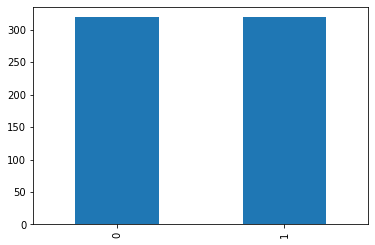

In [104]:
# feature selection after building the basic model
#knn = KNeighborsClassifier(n_neighbors=3)
sfs1 = SFS(knn_model, 
           k_features=5, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=10)

sfs1 = sfs1.fit(X, y)

#sfs = SequentialFeatureSelector(knn, n_features_to_select= 3)
#sfs.fit(X, y)

#sfs.get_support()
#sfs.transform(X).shape
#get_feature_names()
#k_feratures_names_
#X

In [105]:
X = df_test_over.drop(['diagnosis_M'], axis=1)
y = df_test_over['diagnosis_M']

knn_model.fit(X_train,y_train) 
y_pred = knn_model.predict(X_train)

cm = confusion_matrix(y_train, y_pred)
    
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
    
## type ii error
typeii = FN/(TP+FP+FN+TN)
typeii_error.append(typeii)
    
## type i error 
typei = FP/(TP+FP+FN+TN)
typei_error.append(typei)
#Expected cost
cost_i = typei *1
cost_ii = typeii*100
exp_cost = cost_i + cost_ii

print (confusion_matrix(y_train, y_pred))
print ('Type I Error: %.4f' %typei)
print ('Type II Error: %.4f' %typeii)
print ('Expexted Cost: %.4f' %exp_cost)

scores = cross_val_score(knn_model, X, y, cv=10, scoring='accuracy')
print ('Mean Cross Validation Accuracy: %.4f' %scores.mean())

[[314   5]
 [ 10 183]]
Type I Error: 0.0098
Type II Error: 0.0195
Expexted Cost: 1.9629
Mean Cross Validation Accuracy: 0.9552


In [106]:
## Re-run the model using test dataset
knn_model.fit(X_test,y_test) 
y_pred = knn_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
    
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
    
## type ii error
typeii = FN/(TP+FP+FN+TN)
typeii_error.append(typeii)
    
## type i error 
typei = FP/(TP+FP+FN+TN)
typei_error.append(typei)

#Expected cost
cost_i = typei *1
cost_ii = typeii*100
exp_cost = cost_i + cost_ii

print (confusion_matrix(y_test, y_pred))
print ('Type I Error: %.4f' %typei)
print ('Type II Error: %.4f' %typeii)
print ('Expexted Cost: %.4f' %exp_cost)

scores = cross_val_score(knn_model, X_test, y_test, cv=10, scoring='accuracy')
print ('Mean Cross Validation Accuracy: %.4f' %scores.mean())

[[38  0]
 [ 3 16]]
Type I Error: 0.0000
Type II Error: 0.0526
Expexted Cost: 5.2632
Mean Cross Validation Accuracy: 0.9133
